# Global stuff

In [37]:
import os
import glob
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

# Functions

In [38]:
import os

def read_single_file_with_keyword(folder_path, filename_search):
    file_path = os.path.join(folder_path, f"{filename_search}")

    try:
        with open(file_path, 'r') as file:
            # Read and parse the data from the file
            # Assume the data format includes 'q_nm^-1' and 'I'
            data = {
                "q_nm^-1": [],  # List of q values
                "I": [],  # List of corresponding I values
                "sigma": []  # List of corresponding sigma values
            }

            time_hr, CTEMP, I0, bstop = None, None, None, None

            for i, line in enumerate(file):
                if i == 3 and line.startswith("#"):  # Extract values from the 4th line starting with '#'
                    values_str = line[1:].strip().split(',')
                    if len(values_str) == 4:
                        values = [float(val.strip('()')) for val in values_str]
                        time_hr, CTEMP, I0, bstop = values
                    continue

                if line.startswith("#"):  # Skip other comments if any
                    continue

                parts = line.strip().split()  # Assuming data is whitespace-separated
                if len(parts) >= 2:
                    q_value = float(parts[0])
                    I_value = float(parts[1])
                    I_sigma = float(parts[2])
                    # Append values to the data dictionary
                    data["q_nm^-1"].append(q_value)
                    data["I"].append(I_value)
                    data["sigma"].append(I_sigma)

            return data, time_hr, CTEMP, I0, bstop

    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None, None, None, None, None

import os
import re

def search_dat_files_with_keywords(folder_path, keyword, samp_bkg_keyword):
    # Create a regular expression pattern to match the keyword and bkg_keyword in the filename
    pattern = re.compile(f"{samp_bkg_keyword}{keyword}_", re.IGNORECASE)

    matching_dat_files = []

    # List files in the folder (not including subfolders)
    for file in os.listdir(folder_path):
        if pattern.match(file) and file.endswith('.dat'):
            matching_dat_files.append(file)

    #print(f"Found {len(matching_dat_files)} files matching the pattern '{pattern.pattern}'")
    return matching_dat_files


In [39]:
from bumps.names import Parameter
from bumps.fitters import fit

import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt
import pandas as pd

import sasmodels
from sasmodels.core import load_model
from sasmodels.bumps_model import Model, Experiment
import bumps
#import sas

#from pptx import Presentation
#from pptx.util import Inches, Pt


kernel = sasmodels.core.load_model("broad_peak")

# Define model ranges by pre-refining manually
# Do not refine
scale = Parameter(1, name='scale', fixed=True)
background = Parameter(0.0, name='background').range(0, 1)

# Refine
porod_scale = Parameter(0.9, name='porod_scale').range(0, 10)
porod_exp = Parameter(3.0, name='porod_exp').range(0, 10)
lorentz_scale = Parameter(58.0, name='lorentz_scale').range(0, float('inf'))
lorentz_length = Parameter(0.1, name='lorentzian_length').range(0, float('inf'))
peak_pos = Parameter(0.57, name='peak_pos').range(0.25, 1.20)
lorentz_exp = Parameter(2.0, name='lorentz_exp').range(0, 5)

model = Model(model=kernel,
             scale=scale,
             background=background,
             porod_scale=porod_scale,
             porod_exp=porod_exp,
             lorentz_scale=lorentz_scale,
             lorentz_length=lorentz_length,
             peak_pos=peak_pos,
             lorentz_exp=lorentz_exp)

['20', '30', '40', '50', '60', '70', '80', '90', '100', '110', '120', '130', '140', '150', '160', '170', '180', '190', '200']
Run7_PET_T20_dx1_ctr0_scan1_all_average_Norm.dat
Run5_Empty_capi_T20_dx1_ctr0_scan1_all_average_Norm.dat


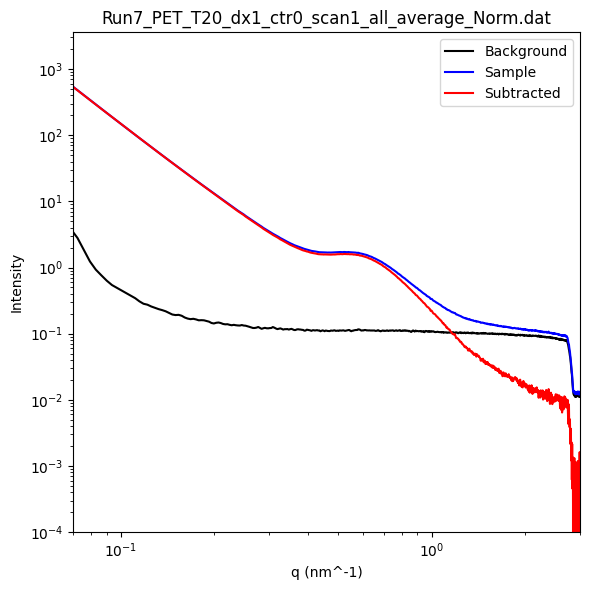

step 1 cost 1013451456.694(12)
                              background |.........          0 in (0,1)
                             lorentz_exp ...|......          2 in (0,5)
                       lorentzian_length |.........        0.1 in (0,inf)
                           lorentz_scale |.........         58 in (0,inf)
                                peak_pos ...|......       0.57 in (0.25,1.2)
                               porod_exp ..|.......          3 in (0,10)
                             porod_scale |.........        0.9 in (0,10)
final chisq 6.090(12)
=== Uncertainty from curvature:     name   value(unc.) ===
                              background   0.80(17)e-3    
                             lorentz_exp   2.4093(50)     
                       lorentzian_length   5.0245(92)     
                           lorentz_scale   1.2180(15)     
                                peak_pos   0.57753(26)    
                               porod_exp   3.56826(80)    
                   

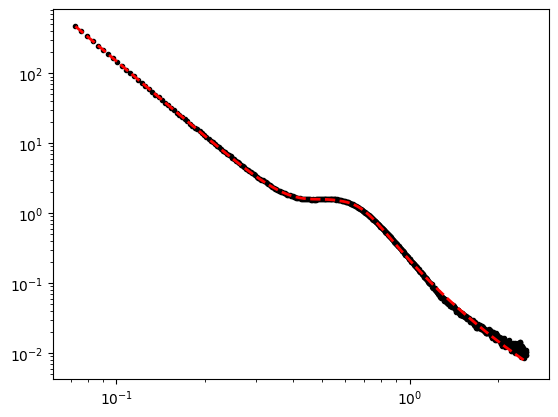

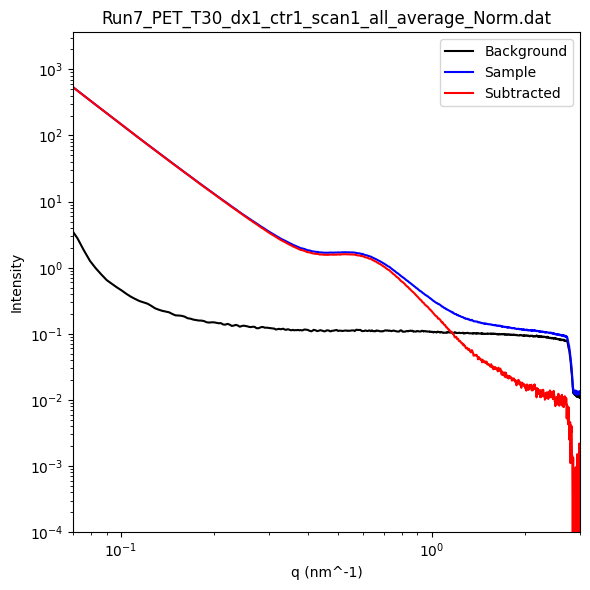

step 1 cost 12.091(12)
                              background |......... 0.000802606 in (0,1)
                             lorentz_exp ....|.....    2.40926 in (0,5)
                       lorentzian_length |.........    5.02446 in (0,inf)
                           lorentz_scale |.........    1.21802 in (0,inf)
                                peak_pos ...|......   0.577529 in (0.25,1.2)
                               porod_exp ...|......    3.56826 in (0,10)
                             porod_scale |.........  0.0401786 in (0,10)
final chisq 5.973(12)
=== Uncertainty from curvature:     name   value(unc.) ===
                              background   0.00124(16)    
                             lorentz_exp   2.4190(50)     
                       lorentzian_length   5.0286(92)     
                           lorentz_scale   1.2170(15)     
                                peak_pos   0.57794(26)    
                               porod_exp   3.56665(80)    
                          

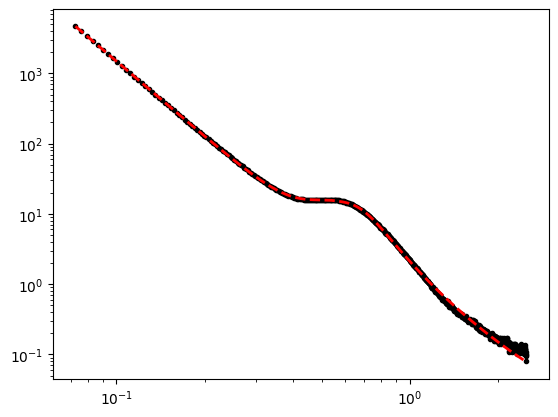

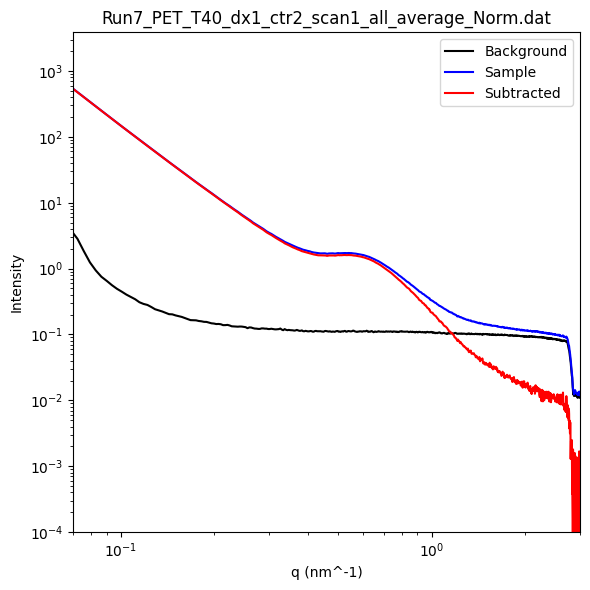

step 1 cost 13.045(12)
                              background |......... 0.00124212 in (0,1)
                             lorentz_exp ....|.....    2.41902 in (0,5)
                       lorentzian_length |.........    5.02859 in (0,inf)
                           lorentz_scale |.........    1.21705 in (0,inf)
                                peak_pos ...|......   0.577942 in (0.25,1.2)
                               porod_exp ...|......    3.56665 in (0,10)
                             porod_scale |.........  0.0402487 in (0,10)
final chisq 6.377(12)
=== Uncertainty from curvature:     name   value(unc.) ===
                              background   0.00128(16)    
                             lorentz_exp   2.4159(50)     
                       lorentzian_length   5.0504(92)     
                           lorentz_scale   1.2276(15)     
                                peak_pos   0.57696(25)    
                               porod_exp   3.56819(80)    
                           

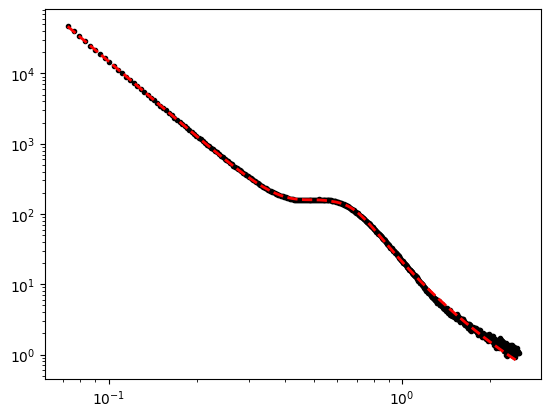

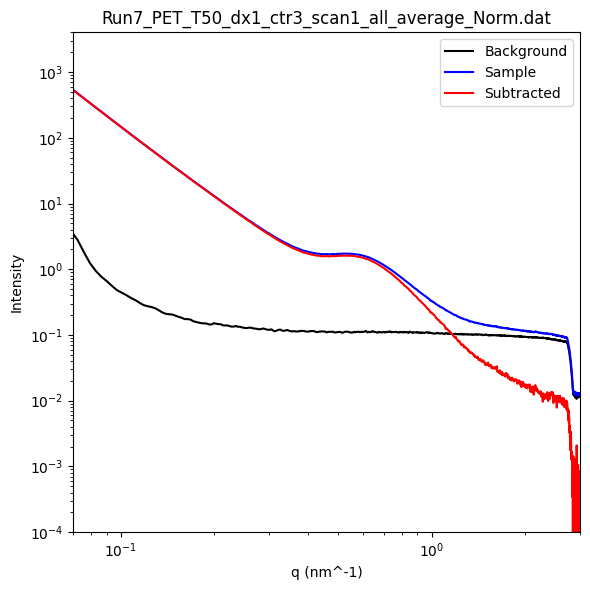

step 1 cost 13.482(12)
                              background |......... 0.00128356 in (0,1)
                             lorentz_exp ....|.....    2.41593 in (0,5)
                       lorentzian_length |.........     5.0504 in (0,inf)
                           lorentz_scale |.........    1.22757 in (0,inf)
                                peak_pos ...|......   0.576963 in (0.25,1.2)
                               porod_exp ...|......    3.56819 in (0,10)
                             porod_scale |.........  0.0400466 in (0,10)
final chisq 6.306(12)
=== Uncertainty from curvature:     name   value(unc.) ===
                              background   0.00146(16)    
                             lorentz_exp   2.4122(50)     
                       lorentzian_length   5.0613(92)     
                           lorentz_scale   1.2324(15)     
                                peak_pos   0.57680(25)    
                               porod_exp   3.56798(80)    
                           

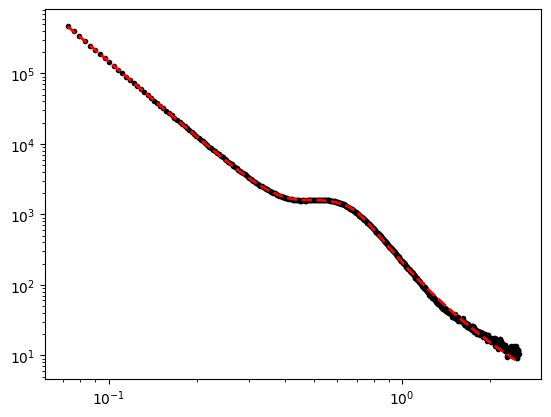

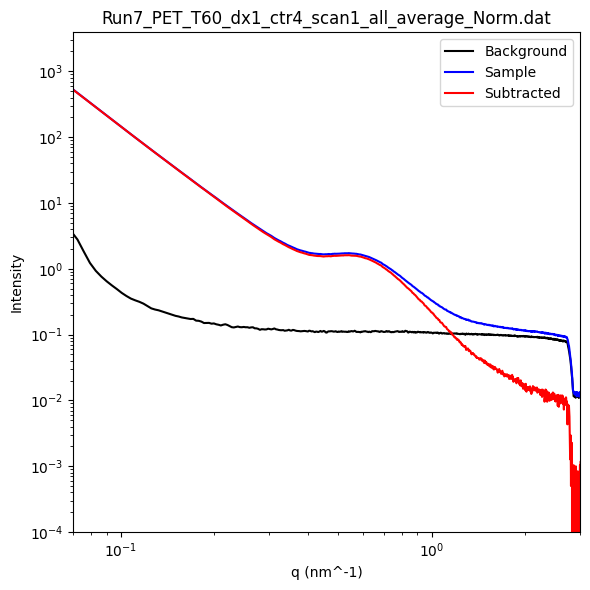

step 1 cost 38.463(12)
                              background |.........  0.0014628 in (0,1)
                             lorentz_exp ....|.....    2.41216 in (0,5)
                       lorentzian_length |.........    5.06135 in (0,inf)
                           lorentz_scale |.........    1.23244 in (0,inf)
                                peak_pos ...|......   0.576801 in (0.25,1.2)
                               porod_exp ...|......    3.56798 in (0,10)
                             porod_scale |.........  0.0398664 in (0,10)
final chisq 5.047(12)
=== Uncertainty from curvature:     name   value(unc.) ===
                              background   0.00147(17)    
                             lorentz_exp   2.3905(48)     
                       lorentzian_length   5.1054(91)     
                           lorentz_scale   1.2560(15)     
                                peak_pos   0.57793(24)    
                               porod_exp   3.60516(81)    
                           

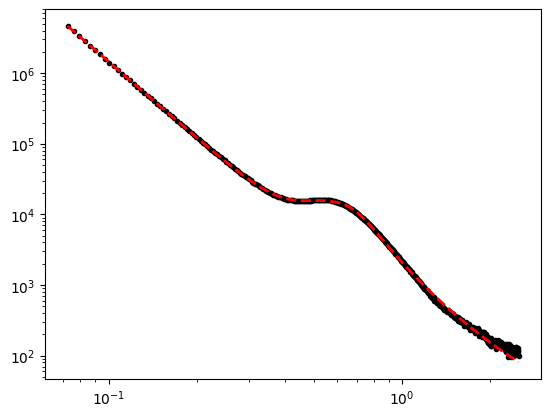

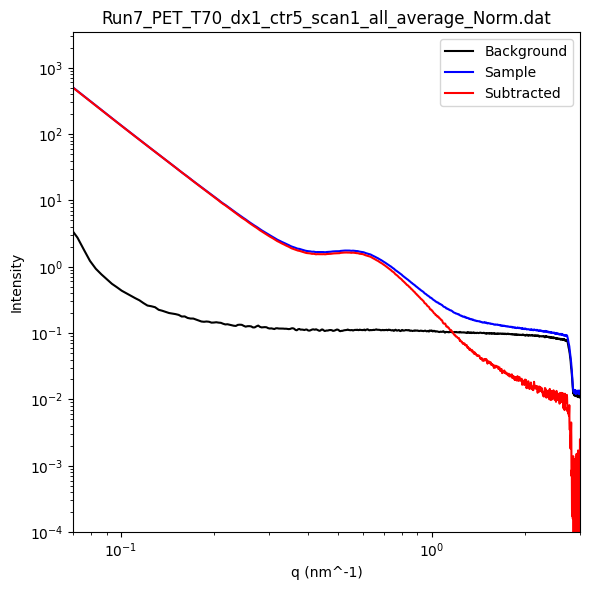

step 1 cost 202.069(12)
                              background |......... 0.00147286 in (0,1)
                             lorentz_exp ....|.....     2.3905 in (0,5)
                       lorentzian_length |.........    5.10536 in (0,inf)
                           lorentz_scale |.........    1.25599 in (0,inf)
                                peak_pos ...|......   0.577926 in (0.25,1.2)
                               porod_exp ...|......    3.60516 in (0,10)
                             porod_scale |.........  0.0360361 in (0,10)
final chisq 4.552(12)
=== Uncertainty from curvature:     name   value(unc.) ===
                              background   0.00209(17)    
                             lorentz_exp   2.3961(46)     
                       lorentzian_length   5.0715(86)     
                           lorentz_scale   1.3339(16)     
                                peak_pos   0.57458(23)    
                               porod_exp   3.65058(86)    
                          

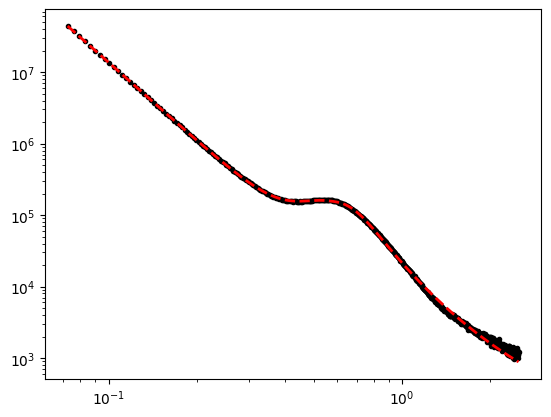

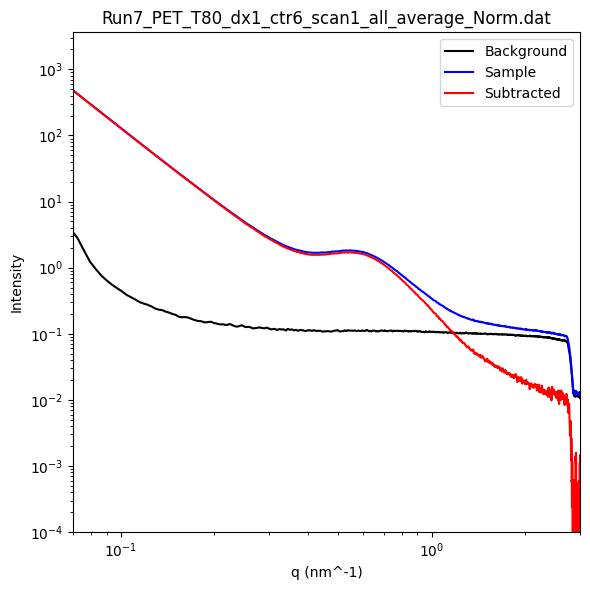

step 1 cost 132.145(12)
                              background |......... 0.00208656 in (0,1)
                             lorentz_exp ....|.....    2.39609 in (0,5)
                       lorentzian_length |.........    5.07148 in (0,inf)
                           lorentz_scale |.........    1.33392 in (0,inf)
                                peak_pos ...|......   0.574577 in (0.25,1.2)
                               porod_exp ...|......    3.65058 in (0,10)
                             porod_scale |.........  0.0303948 in (0,10)
final chisq 4.400(12)
=== Uncertainty from curvature:     name   value(unc.) ===
                              background   0.00246(17)    
                             lorentz_exp   2.3908(43)     
                       lorentzian_length   5.0638(81)     
                           lorentz_scale   1.4250(16)     
                                peak_pos   0.57075(22)    
                               porod_exp   3.68365(90)    
                          

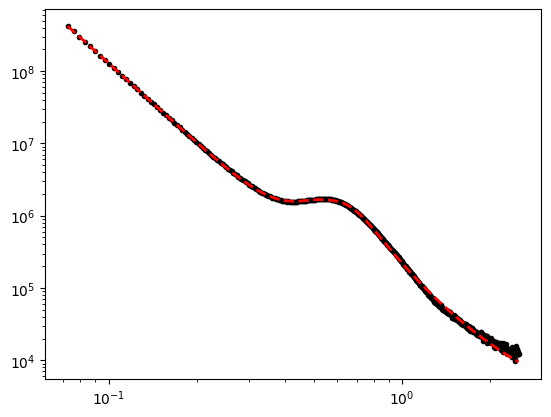

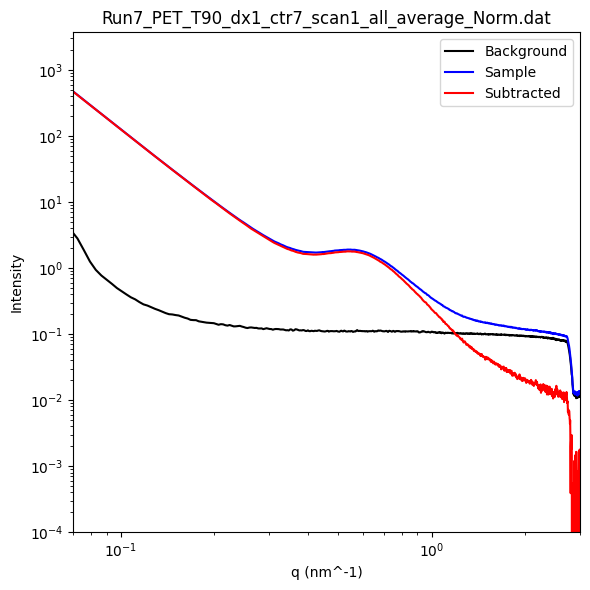

step 1 cost 50.122(12)
                              background |......... 0.00245536 in (0,1)
                             lorentz_exp ....|.....    2.39078 in (0,5)
                       lorentzian_length |.........    5.06382 in (0,inf)
                           lorentz_scale |.........    1.42499 in (0,inf)
                                peak_pos ...|......   0.570746 in (0.25,1.2)
                               porod_exp ...|......    3.68365 in (0,10)
                             porod_scale |.........  0.0266662 in (0,10)
final chisq 4.339(12)
=== Uncertainty from curvature:     name   value(unc.) ===
                              background   0.00320(17)    
                             lorentz_exp   2.3810(41)     
                       lorentzian_length   5.0390(78)     
                           lorentz_scale   1.5125(16)     
                                peak_pos   0.56819(21)    
                               porod_exp   3.70428(92)    
                           

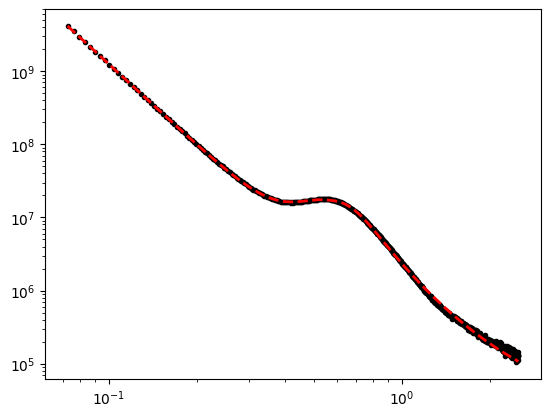

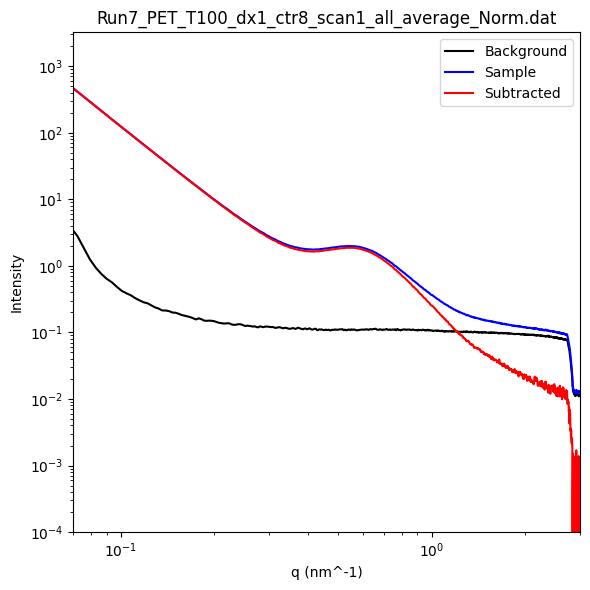

step 1 cost 43.591(12)
                              background |......... 0.00320411 in (0,1)
                             lorentz_exp ....|.....    2.38104 in (0,5)
                       lorentzian_length |.........    5.03902 in (0,inf)
                           lorentz_scale |.........    1.51251 in (0,inf)
                                peak_pos ...|......   0.568193 in (0.25,1.2)
                               porod_exp ...|......    3.70428 in (0,10)
                             porod_scale |.........  0.0248141 in (0,10)
final chisq 4.261(12)
=== Uncertainty from curvature:     name   value(unc.) ===
                              background   0.00339(17)    
                             lorentz_exp   2.3639(39)     
                       lorentzian_length   5.0269(75)     
                           lorentz_scale   1.6051(17)     
                                peak_pos   0.56708(20)    
                               porod_exp   3.71984(94)    
                           

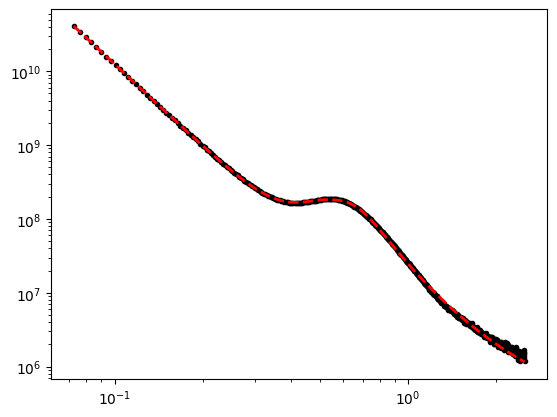

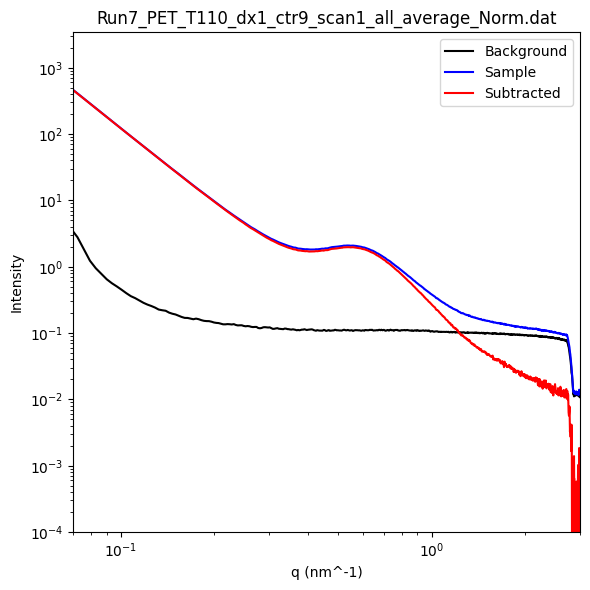

step 1 cost 49.915(12)
                              background |......... 0.00339006 in (0,1)
                             lorentz_exp ....|.....    2.36388 in (0,5)
                       lorentzian_length |.........    5.02689 in (0,inf)
                           lorentz_scale |.........    1.60511 in (0,inf)
                                peak_pos ...|......   0.567079 in (0.25,1.2)
                               porod_exp ...|......    3.71984 in (0,10)
                             porod_scale |.........   0.023539 in (0,10)
final chisq 4.387(12)
=== Uncertainty from curvature:     name   value(unc.) ===
                              background   0.00322(18)    
                             lorentz_exp   2.3514(37)     
                       lorentzian_length   5.0140(71)     
                           lorentz_scale   1.7142(17)     
                                peak_pos   0.56589(19)    
                               porod_exp   3.73453(95)    
                           

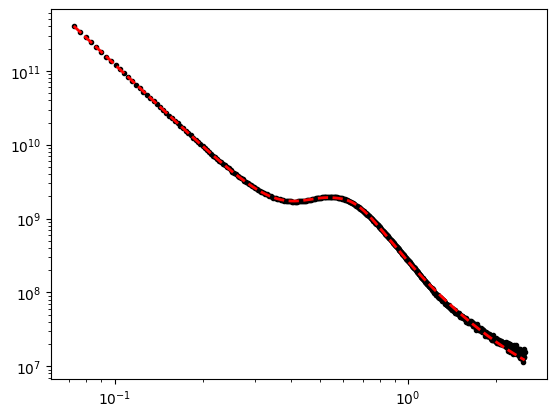

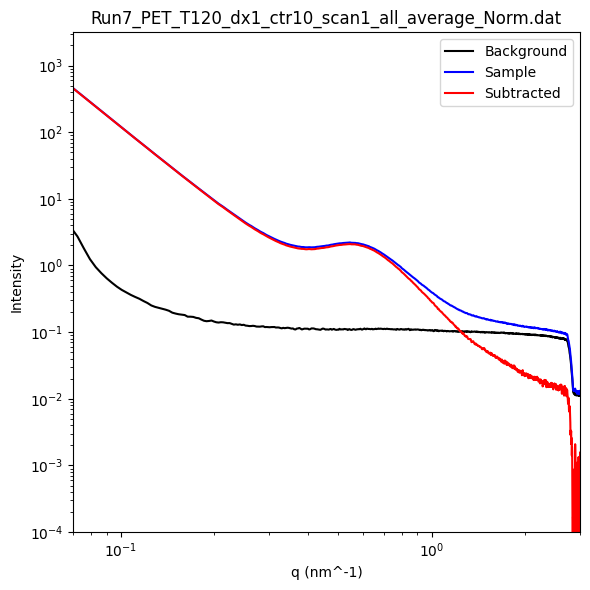

step 1 cost 52.933(12)
                              background |......... 0.00322071 in (0,1)
                             lorentz_exp ....|.....    2.35138 in (0,5)
                       lorentzian_length |.........      5.014 in (0,inf)
                           lorentz_scale |.........    1.71422 in (0,inf)
                                peak_pos ...|......   0.565893 in (0.25,1.2)
                               porod_exp ...|......    3.73453 in (0,10)
                             porod_scale |.........  0.0224287 in (0,10)
final chisq 5.151(12)
=== Uncertainty from curvature:     name   value(unc.) ===
                              background   0.00292(18)    
                             lorentz_exp   2.3478(35)     
                       lorentzian_length   5.0097(68)     
                           lorentz_scale   1.8290(17)     
                                peak_pos   0.56490(18)    
                               porod_exp   3.74543(97)    
                           

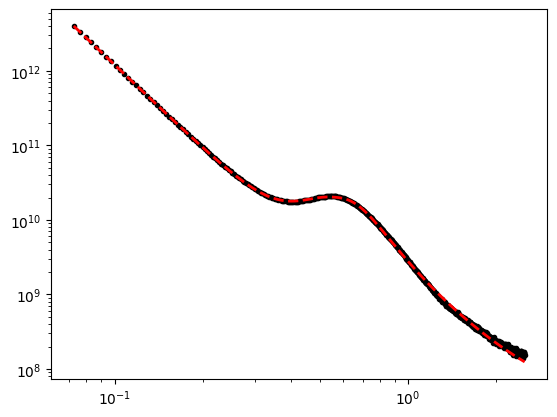

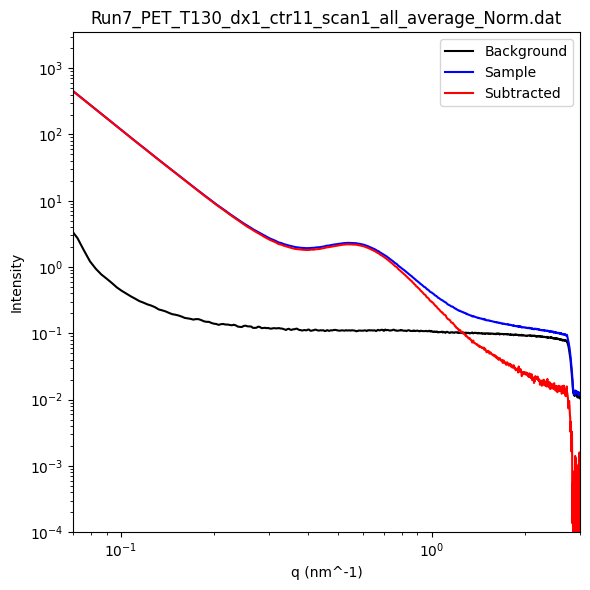

step 1 cost 50.209(12)
                              background |......... 0.00292334 in (0,1)
                             lorentz_exp ....|.....    2.34779 in (0,5)
                       lorentzian_length |.........    5.00973 in (0,inf)
                           lorentz_scale |.........    1.82899 in (0,inf)
                                peak_pos ...|......   0.564901 in (0.25,1.2)
                               porod_exp ...|......    3.74543 in (0,10)
                             porod_scale |.........  0.0215334 in (0,10)
final chisq 5.222(12)
=== Uncertainty from curvature:     name   value(unc.) ===
                              background   0.00300(18)    
                             lorentz_exp   2.3521(34)     
                       lorentzian_length   5.0060(65)     
                           lorentz_scale   1.9429(18)     
                                peak_pos   0.56374(17)    
                               porod_exp   3.75445(98)    
                           

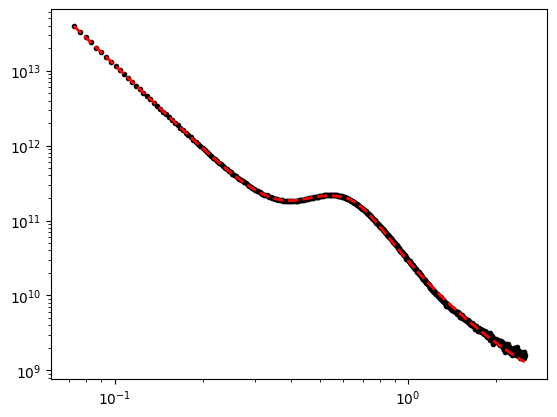

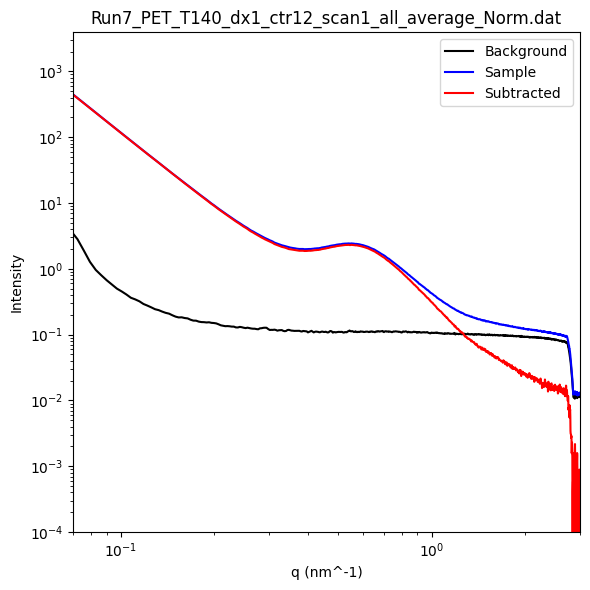

step 1 cost 48.507(12)
                              background |......... 0.00300199 in (0,1)
                             lorentz_exp ....|.....    2.35208 in (0,5)
                       lorentzian_length |.........    5.00603 in (0,inf)
                           lorentz_scale |.........    1.94291 in (0,inf)
                                peak_pos ...|......   0.563736 in (0.25,1.2)
                               porod_exp ...|......    3.75445 in (0,10)
                             porod_scale |.........  0.0207828 in (0,10)
final chisq 5.736(12)
=== Uncertainty from curvature:     name   value(unc.) ===
                              background   0.00247(18)    
                             lorentz_exp   2.3558(32)     
                       lorentzian_length   5.0180(63)     
                           lorentz_scale   2.0610(18)     
                                peak_pos   0.56245(17)    
                               porod_exp   3.76154(99)    
                           

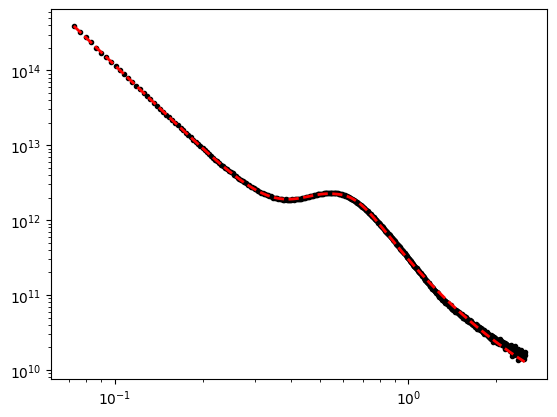

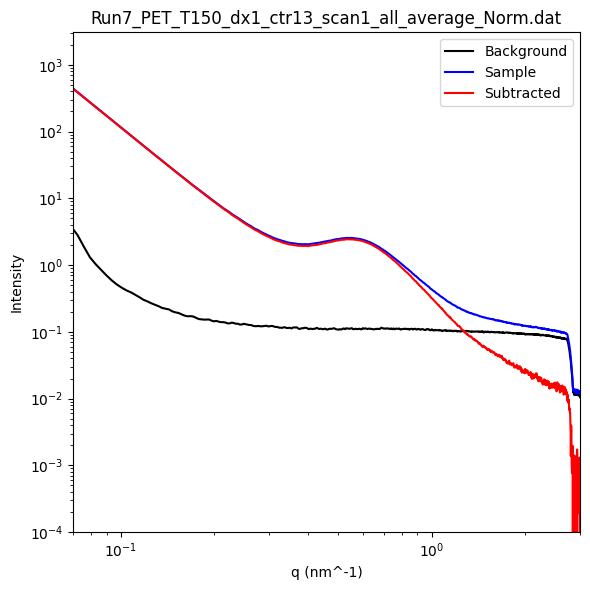

step 1 cost 50.232(12)
                              background |......... 0.00246978 in (0,1)
                             lorentz_exp ....|.....    2.35576 in (0,5)
                       lorentzian_length |.........    5.01801 in (0,inf)
                           lorentz_scale |.........    2.06103 in (0,inf)
                                peak_pos ...|......   0.562447 in (0.25,1.2)
                               porod_exp ...|......    3.76154 in (0,10)
                             porod_scale |.........  0.0201469 in (0,10)
final chisq 6.254(12)
=== Uncertainty from curvature:     name   value(unc.) ===
                              background   0.00225(18)    
                             lorentz_exp   2.3736(31)     
                       lorentzian_length   5.0072(60)     
                           lorentz_scale   2.1789(18)     
                                peak_pos   0.56051(16)    
                               porod_exp   3.7728(10)     
                           

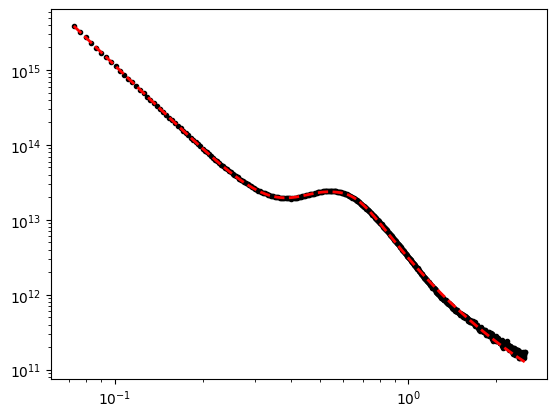

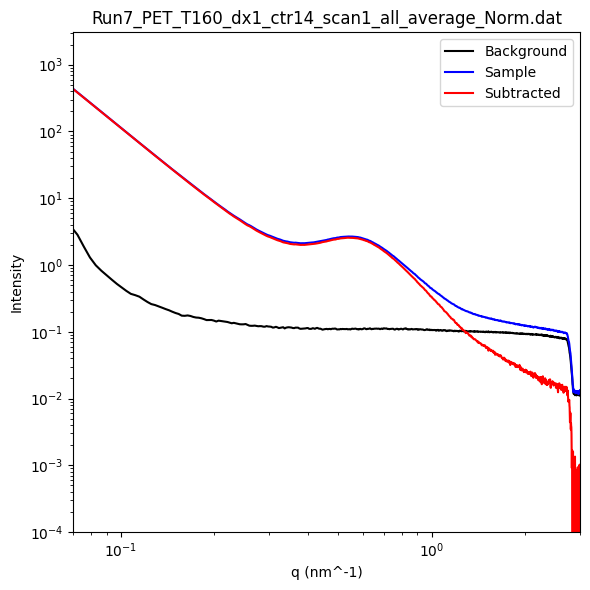

step 1 cost 52.518(12)
                              background |......... 0.00224577 in (0,1)
                             lorentz_exp ....|.....    2.37365 in (0,5)
                       lorentzian_length |.........     5.0072 in (0,inf)
                           lorentz_scale |.........    2.17889 in (0,inf)
                                peak_pos ...|......    0.56051 in (0.25,1.2)
                               porod_exp ...|......    3.77285 in (0,10)
                             porod_scale |.........   0.019312 in (0,10)
final chisq 7.206(12)
=== Uncertainty from curvature:     name   value(unc.) ===
                              background   0.00238(18)    
                             lorentz_exp   2.3887(30)     
                       lorentzian_length   5.0054(58)     
                           lorentz_scale   2.3024(19)     
                                peak_pos   0.55844(15)    
                               porod_exp   3.7804(10)     
                           

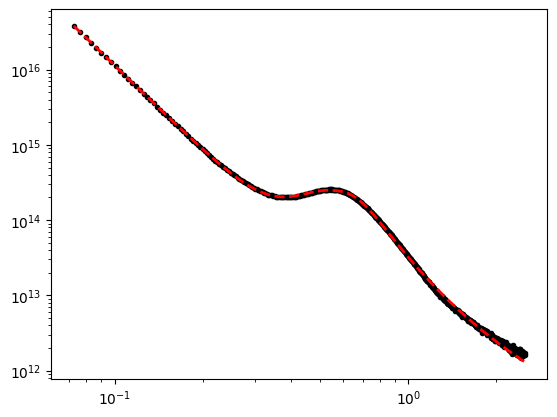

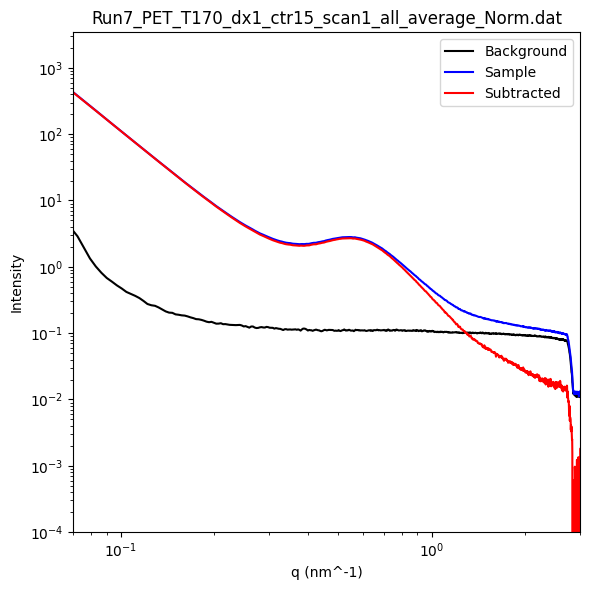

step 1 cost 57.952(12)
                              background |......... 0.00237674 in (0,1)
                             lorentz_exp ....|.....    2.38866 in (0,5)
                       lorentzian_length |.........    5.00535 in (0,inf)
                           lorentz_scale |.........    2.30243 in (0,inf)
                                peak_pos ...|......   0.558441 in (0.25,1.2)
                               porod_exp ...|......    3.78044 in (0,10)
                             porod_scale |.........  0.0186858 in (0,10)
final chisq 7.779(12)
=== Uncertainty from curvature:     name   value(unc.) ===
                              background   0.00291(18)    
                             lorentz_exp   2.4061(29)     
                       lorentzian_length   5.0036(55)     
                           lorentz_scale   2.4387(19)     
                                peak_pos   0.55565(15)    
                               porod_exp   3.7926(10)     
                           

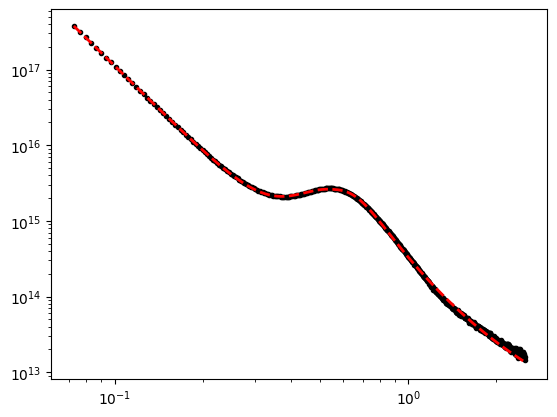

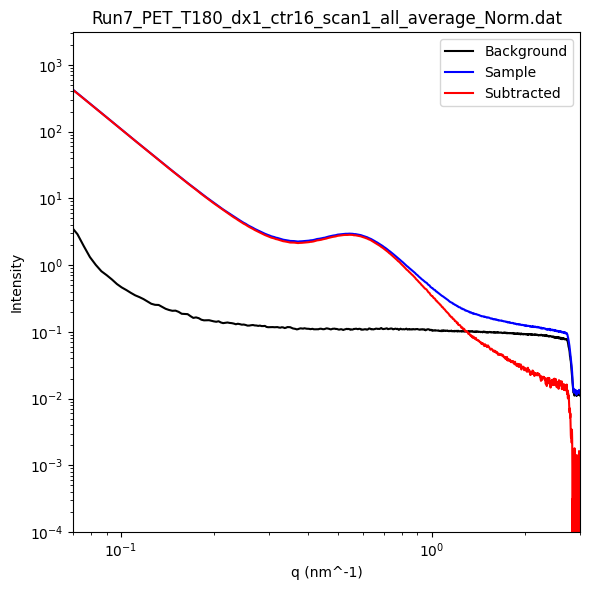

step 1 cost 61.133(12)
                              background |......... 0.00291084 in (0,1)
                             lorentz_exp ....|.....     2.4061 in (0,5)
                       lorentzian_length |.........    5.00364 in (0,inf)
                           lorentz_scale |.........    2.43873 in (0,inf)
                                peak_pos ...|......   0.555654 in (0.25,1.2)
                               porod_exp ...|......     3.7926 in (0,10)
                             porod_scale |.........  0.0178819 in (0,10)
final chisq 8.926(12)
=== Uncertainty from curvature:     name   value(unc.) ===
                              background   0.00341(17)    
                             lorentz_exp   2.4247(28)     
                       lorentzian_length   5.0131(53)     
                           lorentz_scale   2.5787(20)     
                                peak_pos   0.55318(14)    
                               porod_exp   3.8041(11)     
                           

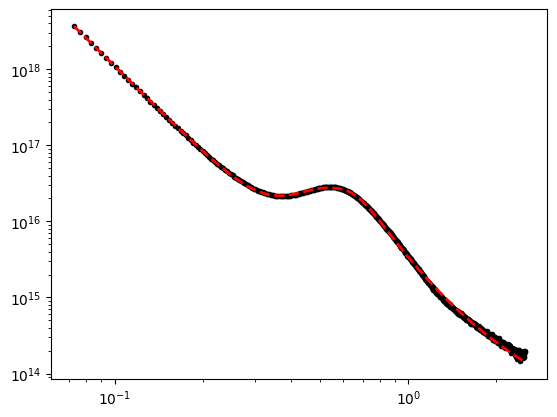

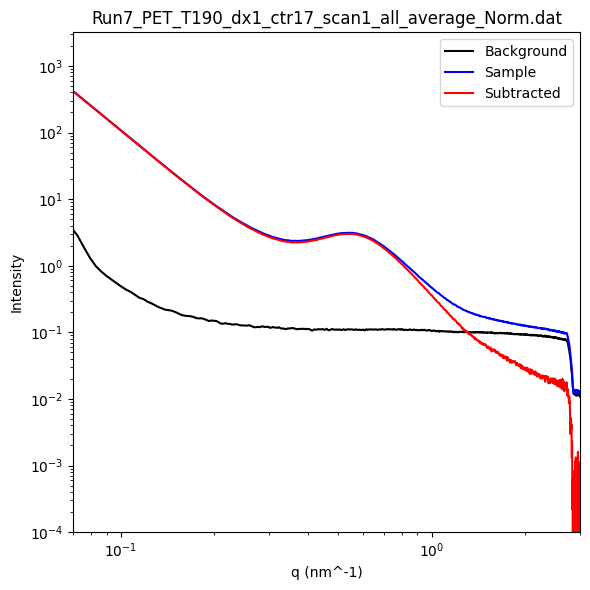

step 1 cost 73.149(12)
                              background |.........  0.0034084 in (0,1)
                             lorentz_exp ....|.....    2.42465 in (0,5)
                       lorentzian_length |.........    5.01312 in (0,inf)
                           lorentz_scale |.........    2.57866 in (0,inf)
                                peak_pos ...|......   0.553177 in (0.25,1.2)
                               porod_exp ...|......    3.80408 in (0,10)
                             porod_scale |.........  0.0170836 in (0,10)
final chisq 10.008(12)
=== Uncertainty from curvature:     name   value(unc.) ===
                              background   0.00406(17)    
                             lorentz_exp   2.4497(27)     
                       lorentzian_length   5.0121(51)     
                           lorentz_scale   2.7388(20)     
                                peak_pos   0.54992(14)    
                               porod_exp   3.8197(11)     
                          

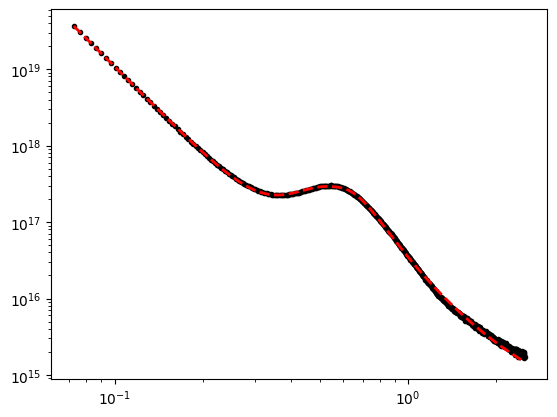

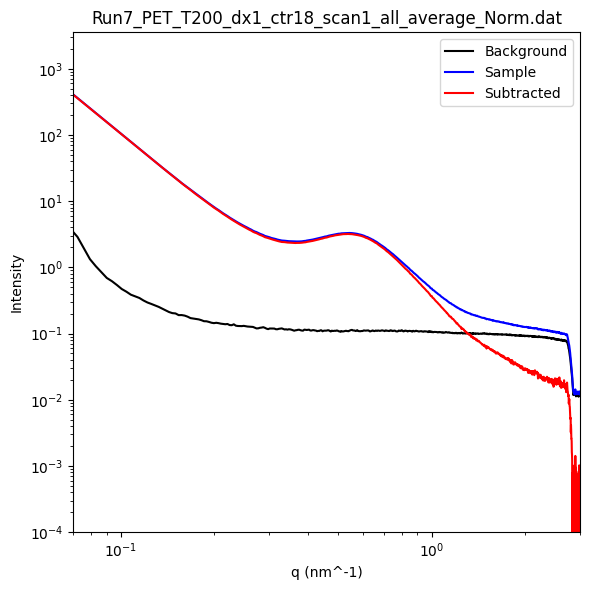

step 1 cost 86.609(12)
                              background |......... 0.00406083 in (0,1)
                             lorentz_exp ....|.....    2.44967 in (0,5)
                       lorentzian_length |.........    5.01209 in (0,inf)
                           lorentz_scale |.........    2.73883 in (0,inf)
                                peak_pos ...|......   0.549921 in (0.25,1.2)
                               porod_exp ...|......    3.81969 in (0,10)
                             porod_scale |.........  0.0161497 in (0,10)
final chisq 11.645(12)
=== Uncertainty from curvature:     name   value(unc.) ===
                              background   0.00453(17)    
                             lorentz_exp   2.4713(26)     
                       lorentzian_length   5.0294(49)     
                           lorentz_scale   2.9159(21)     
                                peak_pos   0.54659(13)    
                               porod_exp   3.8278(11)     
                          

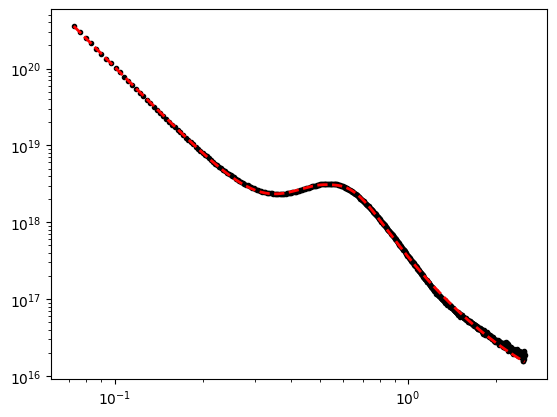

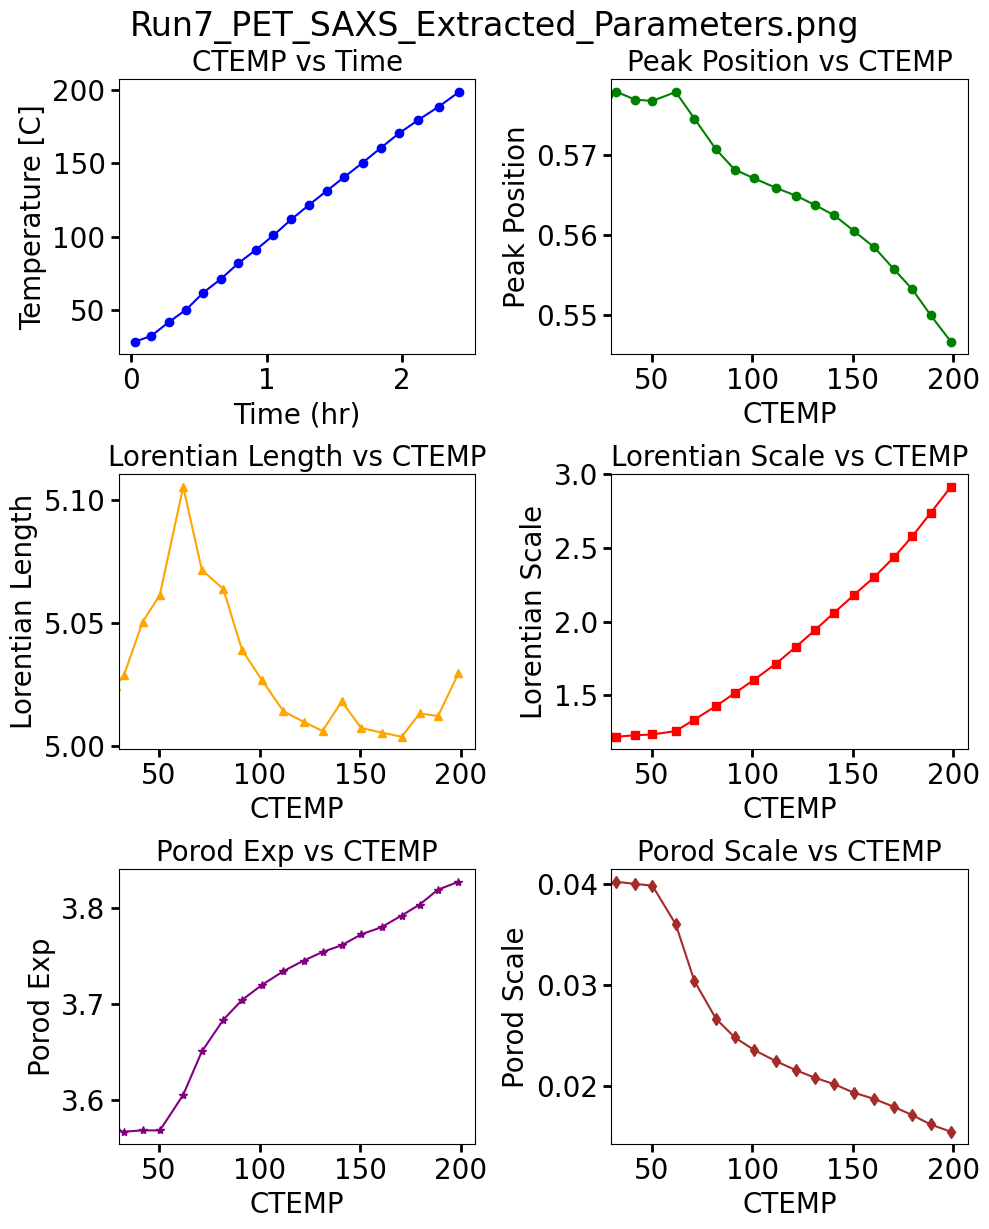

In [40]:

folder_path_saxs_normlised = '/Users/akmaurya/Library/CloudStorage/OneDrive-SLACNationalAcceleratorLaboratory/My Onedrive/Data_01/Methanolysis/Dec2023/OneD_integrated_SAXS_01_mask/Correction/Normlised'
save_SAXS_sub_files = os.path.join(folder_path_saxs_normlised.replace("Normlised", ""), "Subtracted")

search_keywords = [str(10*i) for i in range(2,21)]
print(search_keywords)
sample_keyword = "Run7_PET_T"
bkg_keyword = "Run5_Empty_capi_T"

alpha = 1.05

time_hr_values = []
CTEMP_values = []

lorentian_length_values = []
lorentian_scale_values = []
peak_pos_values = []
porod_exp_values = []
porod_scale_values = []


i = 0
for keyword in search_keywords:

    matching_sample_files = search_dat_files_with_keywords(folder_path_saxs_normlised, keyword, sample_keyword)
    filename_search_sample = matching_sample_files[0]
    print(filename_search_sample)

    matching_bkg_files = search_dat_files_with_keywords(folder_path_saxs_normlised, keyword, bkg_keyword)
    filename_search_bkg = matching_bkg_files[0]
    print(filename_search_bkg)

    bkg_data, time_hr_bkg, CTEMP_bkg, I0_bkg, bstop_bkg = read_single_file_with_keyword(folder_path_saxs_normlised, filename_search_bkg)
    q_bkg = bkg_data["q_nm^-1"]
    I_bkg_avg = bkg_data["I"]
    I_bkg_sigma = bkg_data["sigma"]

    fig, axs = plt.subplots(figsize=(6, 6))
    sample_data, time_hr, CTEMP, I0, bstop = read_single_file_with_keyword(folder_path_saxs_normlised, filename_search_sample)
    q_sample = sample_data["q_nm^-1"]
    I_sample_avg = sample_data["I"]
    I_sample_sigma = sample_data["sigma"]

    I_sample_sub_avg = [sample - alpha * bkg for sample, bkg in zip(I_sample_avg, I_bkg_avg)]
    I_sample_sub_sigma = [np.sqrt(sample**2 + alpha**2 * bkg**2) for sample, bkg in zip(I_sample_sigma, I_bkg_sigma)]

    axs.set_title(filename_search_sample)
    axs.set_xlabel("q (nm^-1)")
    axs.set_ylabel("Intensity")
    axs.loglog(q_bkg, I_bkg_avg, '-k', label="Background")
    axs.loglog(q_sample, I_sample_avg, '-b', label="Sample")
    axs.loglog(q_sample, I_sample_sub_avg, '-r', label="Subtracted")
    axs.legend()

    axs.set_xlim(0.07, 3)
    axs.set_ylim(0.0001,)
    # Adjust layout
    plt.tight_layout()

    # Show the subplots
    plt.show()



    import numpy as np

    # Convert q_sample to a NumPy array
    q_sample = np.array(q_sample)

    # Define the range of values you want to keep
    min_q_value = 0.07  # replace with the minimum q value you want
    max_q_value = 2.5  # replace with the maximum q value you want

    # Create boolean masks for values within the desired range
    mask = (q_sample >= min_q_value) & (q_sample <= max_q_value)

    # Apply the masks to truncate the arrays
    truncated_q_sample = q_sample[mask]
    truncated_I_sample_sub_avg = np.array(I_sample_sub_avg)[mask]
    truncated_I_sample_sub_sigma = np.array(I_sample_sub_sigma)[mask]

    # Create the truncated data_np array
    data_np = np.zeros((len(truncated_q_sample), 3))
    data_np[:, 0] = truncated_q_sample
    data_np[:, 1] = truncated_I_sample_sub_avg
    data_np[:, 2] = truncated_I_sample_sub_sigma


    # removing points that may be below zero due to noise
    mask_zero = np.where(data_np[:,1]>0)[0]
    #data_np = data_np[mask_zero,:]

    # define a Data1D object
    sas_data_np = sasmodels.data.Data1D(x=data_np[:,0], y=data_np[:,1], dy=data_np[:,2])
    #sasmodels.data.plot_data(sas_data_np)

    # define a model
    experiment = sasmodels.bumps_model.Experiment(data=sas_data_np, model=model)
    problem = bumps.fitproblem.FitProblem(experiment)
    results = bumps.fitters.fit(problem, method='lm', verbose=True)
    #problem.plot()

    problem.labels()
    fit_pars=results.fun

    peak_pos=results.x[4]
    peak_pos_values.append(peak_pos)
    lorentian_length=results.x[2]
    lorentian_length_values.append(lorentian_length)
    lorentian_scale=results.x[3]
    lorentian_scale_values.append(lorentian_scale)
    porod_exp=results.x[5]
    porod_exp_values.append(porod_exp)
    porod_scale=results.x[6]
    porod_scale_values.append(porod_scale)  

    # Plot the data and the fit 

    yobs  = sas_data_np.y 
    ycalc = problem.fitness.theory() 

    if display:
        plt.loglog(sas_data_np.x, yobs* 10**i, 'o', markersize=3, color='k', linewidth=2, label='subtracted')
        plt.loglog(sas_data_np.x, ycalc* 10**i, '--', color='red', linewidth=2, label='fit')  
    ##################################################################


    ###################################save###################################
# Assuming you have already defined q_sample, I_sample_sub_avg, filename_search_sample, filename_search_bkg, time_hr, CTEMP, I0, bstop

    # Create a DataFrame for subtracted data
    data = {"q_nm^-1": truncated_q_sample, "I_avg_sub": truncated_I_sample_sub_avg, "I_avg_sub_sigma": truncated_I_sample_sub_sigma,"I_fit":ycalc}
    df = pd.DataFrame(data)

    # Define the data file path
    # Extract the part of filename_search_sample before "scan1"
    filename_search_sample1 = filename_search_sample.split("scan1")[0]
    dat_filename = os.path.join(save_SAXS_sub_files, f"{filename_search_sample1}all_avg_sub.dat")
    print(dat_filename)
    # Define the headers
    headers = [
        f"Sample: {filename_search_sample}",
        f"Background: {filename_search_bkg}",
        'Time_duration_hr  ----- CTEMP -----  I0 ----- bstop',
        f"{time_hr}, {CTEMP}, {I0},{bstop}", 

        'lorentian_length  ----- lorentian_scale -----  peak_pos ----- porod_exp ----- porod_scale',
        f"{lorentian_length}, {lorentian_scale}, {peak_pos},{porod_exp},{porod_scale}",
        "q_nm^-1 ------ I_avg_subtracted ------ I_avg_subtracted_sigma ------ I_fit",
    ]
    commented_headers = ['# ' + header for header in headers]

    # Write the data to the file
    with open(dat_filename, 'w') as dat_file:
        dat_file.write('\n'.join(commented_headers) + '\n')
        df.to_csv(dat_file, sep='\t', index=False, header=False)

    # Store time_hr and CTEMP values
    time_hr_values.append(time_hr)
    CTEMP_values.append(CTEMP)

    i += 1

import matplotlib.pyplot as plt
import seaborn as sns



# Set Seaborn style for improved aesthetics
#sns.set(style="darkgrid")

# Create 'Figure' folder if it doesn't exist
folder_path = save_SAXS_sub_files
figure_folder_path = os.path.join(folder_path, "Figure")
if not os.path.exists(figure_folder_path):
    os.makedirs(figure_folder_path)

# Create a figure with multiple subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Subplot 1: CTEMP vs Time
axs[0, 0].plot(time_hr_values, CTEMP_values, marker='o', linestyle='-', color='blue')
axs[0, 0].set_xlabel("Time (hr)", fontsize=20, color='black')
axs[0, 0].set_ylabel("Temperature [C]", fontsize=20, color='black')
axs[0, 0].set_title("CTEMP vs Time", fontsize=20, color='black')
#axs[0, 0].grid(True, color='black')
axs[0, 0].tick_params(axis='both', which='both', labelsize=20, colors='black', width=2, length=6, direction='out')
axs[0, 0].spines['bottom'].set_color('black')
axs[0, 0].spines['top'].set_color('black')
axs[0, 0].spines['right'].set_color('black')
axs[0, 0].spines['left'].set_color('black')


# Subplot 2: Peak Position vs CTEMP
axs[0, 1].plot(CTEMP_values, peak_pos_values, marker='o', linestyle='-', color='green')
axs[0, 1].set_xlabel("CTEMP", fontsize=20, color='black')
axs[0, 1].set_ylabel("Peak Position", fontsize=20, color='black')
axs[0, 1].set_title("Peak Position vs CTEMP", fontsize=20, color='black')
#axs[0, 1].grid(True, color='black')
axs[0, 1].tick_params(axis='both', which='both', labelsize=20, colors='black', width=2, length=6, direction='out')
axs[0, 1].spines['bottom'].set_color('black')
axs[0, 1].spines['top'].set_color('black')
axs[0, 1].spines['right'].set_color('black')
axs[0, 1].spines['left'].set_color('black')
axs[0, 1].set_xlim(30, )

# Subplot 3: Lorentian Length vs CTEMP
axs[1, 0].plot(CTEMP_values, lorentian_length_values, marker='^', linestyle='-', color='orange')
axs[1, 0].set_xlabel("CTEMP", fontsize=20, color='black')
axs[1, 0].set_ylabel("Lorentian Length", fontsize=20, color='black')
axs[1, 0].set_title("Lorentian Length vs CTEMP", fontsize=20, color='black')
#axs[1, 0].grid(True, color='black')
axs[1, 0].tick_params(axis='both', which='both', labelsize=20, colors='black', width=2, length=6, direction='out')
axs[1, 0].spines['bottom'].set_color('black')
axs[1, 0].spines['top'].set_color('black')
axs[1, 0].spines['right'].set_color('black')
axs[1, 0].spines['left'].set_color('black')
axs[1, 0].set_xlim(30, )

# Subplot 4: Lorentian Scale vs CTEMP
axs[1, 1].plot(CTEMP_values, lorentian_scale_values, marker='s', linestyle='-', color='red')
axs[1, 1].set_xlabel("CTEMP", fontsize=20, color='black')
axs[1, 1].set_ylabel("Lorentian Scale", fontsize=20, color='black')
axs[1, 1].set_title("Lorentian Scale vs CTEMP", fontsize=20, color='black')
#axs[1, 1].grid(True, color='black')
axs[1, 1].tick_params(axis='both', which='both', labelsize=20, colors='black', width=2, length=6, direction='out')
axs[1, 1].spines['bottom'].set_color('black')
axs[1, 1].spines['top'].set_color('black')
axs[1, 1].spines['right'].set_color('black')
axs[1, 1].spines['left'].set_color('black')
axs[1, 1].set_xlim(30, )

# Subplot 5: Porod Exp vs CTEMP
axs[2, 0].plot(CTEMP_values, porod_exp_values, marker='*', linestyle='-', color='purple')
axs[2, 0].set_xlabel("CTEMP", fontsize=20, color='black')
axs[2, 0].set_ylabel("Porod Exp", fontsize=20, color='black')
axs[2, 0].set_title("Porod Exp vs CTEMP", fontsize=20, color='black')
#axs[2, 0].grid(True, color='black')
axs[2, 0].tick_params(axis='both', which='both', labelsize=20, colors='black', width=2, length=6, direction='out')
axs[2, 0].spines['bottom'].set_color('black')
axs[2, 0].spines['top'].set_color('black')
axs[2, 0].spines['right'].set_color('black')
axs[2, 0].spines['left'].set_color('black')
axs[2, 0].set_xlim(30, )

# Subplot 6: Porod Scale vs CTEMP
axs[2, 1].plot(CTEMP_values, porod_scale_values, marker='d', linestyle='-', color='brown')
axs[2, 1].set_xlabel("CTEMP", fontsize=20, color='black')
axs[2, 1].set_ylabel("Porod Scale", fontsize=20, color='black')
axs[2, 1].set_title("Porod Scale vs CTEMP", fontsize=20, color='black')
#axs[2, 1].grid(True, color='black')
axs[2, 1].tick_params(axis='both', which='both', labelsize=20, colors='black', width=2, length=6, direction='out')
axs[2, 1].spines['bottom'].set_color('black')
axs[2, 1].spines['top'].set_color('black')
axs[2, 1].spines['right'].set_color('black')
axs[2, 1].spines['left'].set_color('black')
axs[2, 1].set_xlim(30, )

# Adjust layout for better spacing
plt.tight_layout()

# Add overall title
# Save the figure in the 'Figure' folder
filename_search_sample1 = filename_search_sample.split("_T")[0]
fig.suptitle(f"{filename_search_sample1}_SAXS_Extracted_Parameters.png", fontsize=24, color='black', y=1.02)

# Save the figure in the 'Figure' folder
filename_search_sample1 = filename_search_sample.split("_T")[0]
fig.savefig(os.path.join(figure_folder_path, f"{filename_search_sample1}_SAXS_Extracted_Parameters.png"), bbox_inches='tight')

# Show the plots
plt.show()
